# Task 4

First, update the following cell to have a link to your Homework 1 GitHub repository:

UPDATE THIS LINK:

https://github.com/fletcher-m/eds220-hwk-1.git

In this task, make at least 5 commits at moments you think are adequate. We'll look at your repo to check commit history. Err on the side of commenting too much for now to get in the habit.

Add comments for all your code. Err on the side of commenting too much for now.

Comments in each exercise and commits will count towards your grade.

This task covers topics we will see on Wednesday Oct. 11. You might want to wait until after that class to solve it.

## Acknowledgement
This task was adapted from the *Pandas Fundamentals with Earthquake Data* assignment from the e-book [Earth and Environmental Data Science](https://earth-env-data-science.github.io/intro.html)

## About the data

For this task we are going to use simplified data from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/). This dataset is in tabular format and has the following columns:

- time = date and time of event (all events from 2014)
- latitude = decimal degrees [-90,90]
- longitude = decimal degrees [-360,360]
- depth = depth of the event (km)
- mag =  magnitude of event
- id = event identifier
- place = where the event took place
- type = type of event

## 1 

a. Import pandas (always with standard abbreviation!).

b. Use `pd.read_csv()` to import the `earthquake_data.csv` dataset and store it as `raw_eqk` (variable name).

c. Look at the head of the dataframe.

In [1]:
# import pandas with standard abbreviation
import pandas as pd

# import the earthquake data
raw_eqk = pd.read_csv('data/earthquake_data.csv')

# look at first 5 rows of earthquake data frame
raw_eqk.head()

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ak11151135,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ci37171541,"10km WNW of Progreso, Mexico",earthquake


## 2
a. Print the shape of the `raw_eqk` dataframe.

b. Print the type of `raw_eqk`'s shape.

c. Print *only* the number of rows by accessing it from `raw_eqk`'s shape. HINT: how do you index an element in a tuple?

In [2]:
# show number of rows and columns of earthquake data frame
print(raw_eqk.shape)

# show the type of the data frame's shape
print(type(raw_eqk.shape))

# print the number of rows by indexing from the .shape output of the data frame
print(raw_eqk.shape[0])

(120108, 8)
<class 'tuple'>
120108


## 3

Get the unique values of the type of events.

In [3]:
# get all different (unique) values from the 'type' column in the df
raw_eqk.type.unique()

array(['earthquake', 'quarry blast', 'quarry', 'mining explosion',
       'rock burst', 'explosion', 'landslide', 'sonicboom', 'sonic boom',
       'anthropogenic event', 'acoustic noise'], dtype=object)

# 4

a. Select only earthquake events and store them as `eqk` (variable name)

b. Update the index of `eqk` to be the `id` column of the dataframe. 

c. Check the new index by viewing the first 3 rows of `eqk`.

In [4]:
# filter all rows with 'earthquake' in the 'type' column and store it as 'eqk'
eqk = raw_eqk[raw_eqk['type']=='earthquake']

# set the index of eqk df to be the 'id' column
eqk = eqk.set_index('id')

# check the first 3 rows of the eqk df
eqk.head(3)
eqk

,time,latitude,longitude,depth,mag,place,type
id,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...
ak11453391,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,"29km SW of Valdez, Alaska",earthquake
ak11453395,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,"102km SSE of Old Iliamna, Alaska",earthquake
nc72358451,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,"9km WNW of Cobb, California",earthquake


# 5

How many events were left out of `raw_eqk` when you selected ony earthqake events? 

HINT: There are *many* ways you can get this information. One could be to use (2).

In [5]:
# find out how many events were left out when I selected for just 'earthquake' events - there are 1,710 events that are not 'earthquake' 
raw_eqk[raw_eqk['type']!= 'earthquake']


,time,latitude,longitude,depth,mag,id,place,type
5,2014-01-31 23:30:36.930,32.567667,-117.013500,0.01,1.51,ci11419722,"3km N of Tijuana, Mexico",quarry blast
30,2014-01-31 21:59:43.500,46.308700,-122.721500,0.00,0.80,uw60681512,"14km ENE of Castle Rock, Washington",quarry
36,2014-01-31 21:22:37.700,47.914800,-121.680000,0.00,0.70,uw60681442,"6km N of Gold Bar, Washington",quarry
60,2014-01-31 20:06:45.780,43.757800,-105.299100,0.00,3.40,usc000meuw,Wyoming,mining explosion
69,2014-01-31 19:40:13.400,47.780300,-118.744300,0.00,1.50,uw60681312,"26km SE of Coulee Dam, Washington",quarry
...,...,...,...,...,...,...,...,...
119783,2014-12-02 00:00:02.640,48.086167,-121.966667,0.01,1.80,uw60936741,"0km NNE of Granite Falls, Washington",anthropogenic event
119792,2014-12-01 23:42:29.910,44.554500,-123.343833,0.01,1.88,uw60936711,"2km NE of Philomath, Oregon",anthropogenic event
119809,2014-12-01 22:27:11.200,44.380333,-121.014500,0.01,1.98,uw60936556,"13km ENE of Terrebonne, Oregon",anthropogenic event
119812,2014-12-01 22:12:40.500,49.406000,-120.508333,0.01,2.18,uw60936526,"5km S of Princeton, Canada",anthropogenic event


# 6
Without creating any new variables, plot a histogram of the eartquake's magnitudes (`eqk` data). Add a title and change the color of your graph.

<AxesSubplot:title={'center':'Frequency of Earthquake Magnitudes'}, ylabel='Frequency'>

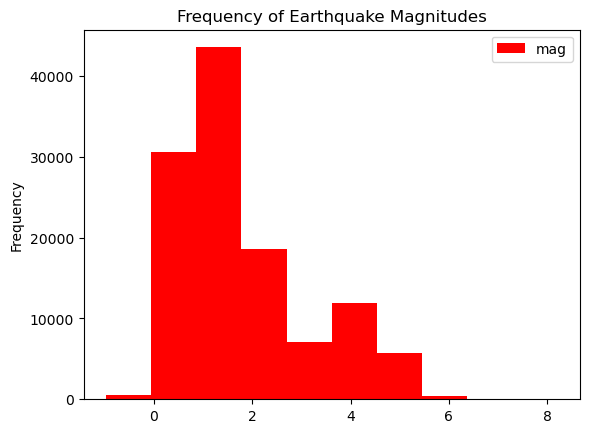

In [6]:
# make histogram of earthquake magnitudes and their corresponding frequencies
eqk.plot(kind='hist',
        y='mag',
        color='red',
        title='Frequency of Earthquake Magnitudes')

# 7

a. Create a new variable `top20` with the 20 earthquakes with largest magnitude. HINT: [`pandas.Series.nlargest`](https://pandas.pydata.org/docs/reference/api/pandas.Series.nlargest.html)

b. Create a bar plot showing the magnitude of the top 20 earthquakes. Update the title, x-axis label, y-axis label, and color of the bars. 

c. What is the role of the `top20` index in the graph? What would have happened if we had not updated the index?

<AxesSubplot:title={'center':'Magnitude of 20 Largest Earthquakes'}, xlabel='ID', ylabel='Magnitude'>

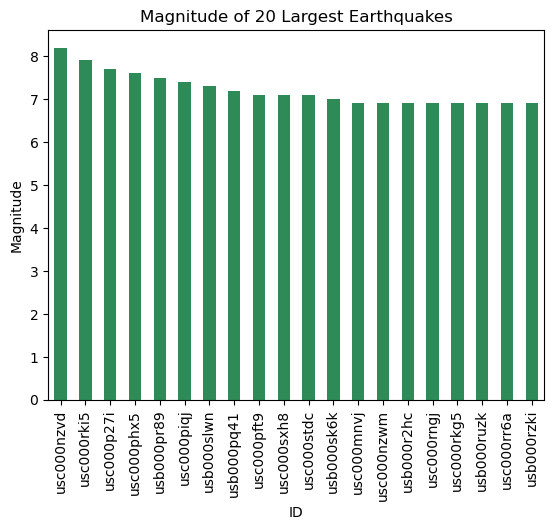

In [17]:
# assign the 'mag' column of eqk to 'top20'
top20 = eqk['mag']

# find the 20 largest values in the 'mag' column of eqk data set
new_data = top20.nlargest(20)

# make a bar plot showing the magnitudes of the 20 largest earthquakes
new_data.plot(kind='bar',
        color='seagreen',
        title ='Magnitude of 20 Largest Earthquakes',
        ylabel='Magnitude',
        xlabel='ID')

If we had not updated the index to 'ID', it would have defaulted to indexing by row number, which is harder to track than unique ID's of each earthquake.

# 8 
We are interested in place, magnitude and depth of the top 20 earthquakes with largest magnitude. Select this data from the `eqk` data frame.

HINT: This is a "select rows and columns simultaneously" from `eqk` exercise. To select the rows you could use the index of `top20`.

In [23]:
# filter data to include rows from the 'top20' data, with columns 'place', 'mag', and 'depth'
eqk.loc[new_data.index, ['place', 'mag', 'depth']]

,place,mag,depth
id,,,
usc000nzvd,"94km NW of Iquique, Chile",8.2,25.00
usc000rki5,"19km SE of Little Sitkin Island, Alaska",7.9,109.00
usc000p27i,"53km SW of Iquique, Chile",7.7,22.40
usc000phx5,"93km SSE of Kirakira, Solomon Islands",7.6,22.56
usb000pr89,"70km SW of Panguna, Papua New Guinea",7.5,43.37
usc000piqj,"112km S of Kirakira, Solomon Islands",7.4,39.00
usb000slwn,"74km S of Intipuca, El Salvador",7.3,40.00
usb000pq41,"33km ESE of Petatlan, Mexico",7.2,24.00
usc000pft9,"56km WSW of Panguna, Papua New Guinea",7.1,60.53


# 9 

Without creating any new variables, visualize the locations of eartquakes with magnitude greter than 5 by creating a scatter plot of their latitude and longitude. Make the following adjustments to the basic plot:
- update the title
- color the points by magnitude (HINT: [check the `c` parameter here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html))
- adjust the `alpha` (transparency) argument
- adjust the `colormap` argument to maket it look prettier. [Click for ideas of sequential colormaps.](https://matplotlib.org/stable/users/explain/colors/colormaps.html)


<AxesSubplot:title={'center':'Earthquak Locations with Magnitude Greater than 5'}, xlabel='latitude', ylabel='longitude'>

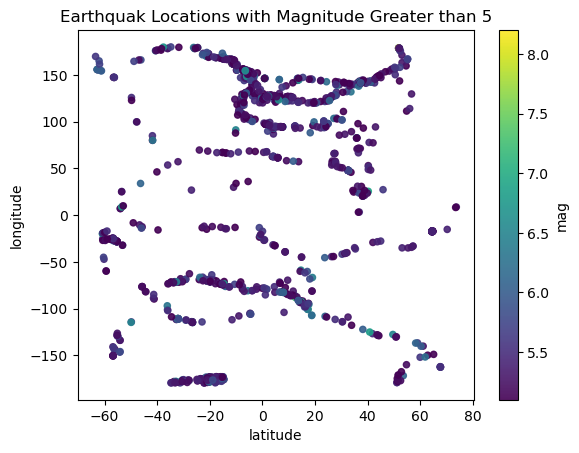

In [40]:
# make a new data set that only includes earthquakes with a magnitude of over 5 (not sure how to do this without creating this variable)
great_5 = eqk[eqk['mag']>5]

# create a scatter plot of earthquakes with a magnitude of over 5 and scale colors that correspond to magnitude
great_5.plot(kind='scatter',
        x='latitude', 
        y='longitude',
        title='Earthquak Locations with Magnitude Greater than 5',
        c='mag',
        colormap='viridis',
        alpha=0.9
        )